In [1]:
import pandas as pd
import pickle
from sklearn import ensemble
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
processed_input = "assets/log_data.csv"

input_df = pd.read_csv(processed_input)
input_df.columns

Index(['timestamp', 'process_id', 'username', 'ip', 'is_private', 'is_root',
       'is_failure', 'time_since_last_failure',
       'time_since_last_failure_of_same_type', 'failure_count_in_last_15_mins',
       'failure_count_in_last_30_mins', 'failure_count_in_last_60_mins',
       'label_auth_failure', 'label_break_in_attempt',
       'label_connection_closed', 'label_disconnect', 'label_failed_password',
       'label_invalid_user', 'label_no_label', 'label_no_identification',
       'class'],
      dtype='object')

In [3]:
x = input_df[['is_private', 'is_root', 'is_failure', 'time_since_last_failure_of_same_type', 'failure_count_in_last_15_mins',
       'failure_count_in_last_30_mins', 'failure_count_in_last_60_mins','label_auth_failure', 'label_break_in_attempt',
       'label_connection_closed', 'label_disconnect', 'label_failed_password',
       'label_invalid_user', 'label_no_label', 'label_no_identification']]
y = input_df[['class']]

In [4]:
y.shape

(542861, 1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=30, max_depth=7)

In [7]:
model.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=7, n_estimators=30)

In [8]:
pickle.dump(model, open('ml_model.pkl', 'wb'))

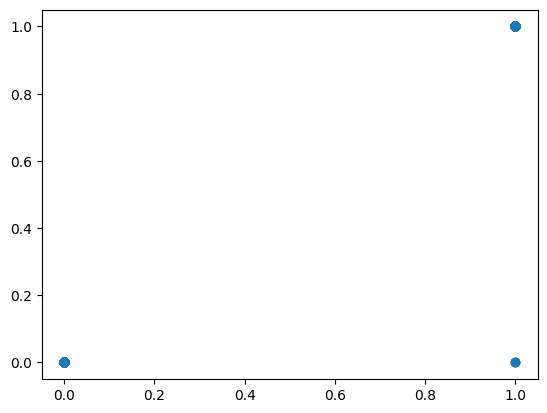

In [9]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

In [10]:
from sklearn import metrics
import numpy as np

print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

1.5789307480973884e-05
1.5789307480973884e-05
0.003973576157691442


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175935
           1       1.00      1.00      1.00     14067

    accuracy                           1.00    190002
   macro avg       1.00      1.00      1.00    190002
weighted avg       1.00      1.00      1.00    190002

